In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_excel(r'C:\Users\Madushanka Ranaweera\Desktop\Python\diabetes_DS.xlsx')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Checking is there any missing values

In [3]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

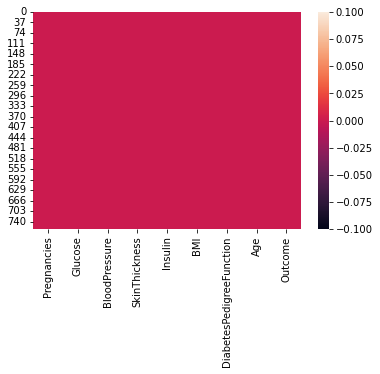

In [4]:
sns.heatmap(data.isnull())

There is no any missing values

## Co-relation matrix
A correlation matrix is a table that shows the correlation coefficients for various variables. The correlation between all potential pairs of values in a table is shown in the matrix. It is an effective tool for compiling a sizable dataset and for locating and displaying data patterns.

In [5]:
correlation = data.corr()

<AxesSubplot:>

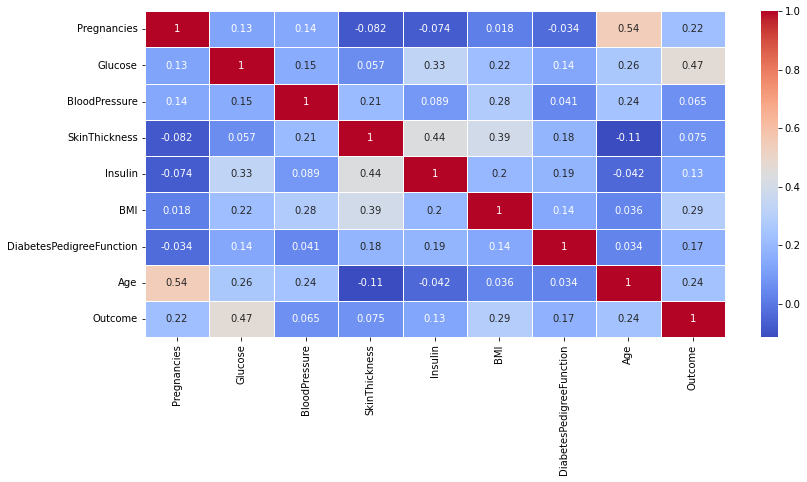

In [6]:
fig , ax = plt.subplots(figsize=(13,6)) 
sns.heatmap(correlation, cmap="coolwarm", linecolor='white' , annot=True , linewidths=1 , ax=ax )

 #### Blood preasure and Skin thickness is low correlate with the outcome parameter. But here I'm not goint to drop those columns

## Train Test Split

In [7]:
X = data.drop('Outcome',axis=1)
Y = data['Outcome']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=21)

In [8]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.fit_transform(X_test)

In [9]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [10]:
print("X train :\n")
display(X_train.head())
print("X test :\n")
display(X_test.head())

X train :



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.411765,0.809045,0.704918,0.000000,0.000000,0.453055,0.037148,0.530612
1,0.058824,0.643216,0.672131,0.171717,0.216312,0.409836,0.015798,0.020408
2,0.235294,0.663317,0.704918,0.313131,0.000000,0.417288,0.145602,0.857143
3,0.000000,0.829146,0.622951,0.434343,0.301418,0.713860,0.077284,0.102041
4,0.058824,0.457286,0.442623,0.252525,0.118203,0.375559,0.066610,0.040816


X test :



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.307692,0.683673,0.705882,0.000000,0.000000,0.455067,0.087568,0.650000
1,0.538462,0.540816,0.901961,0.333333,0.000000,0.434034,0.068512,0.450000
2,0.615385,0.433673,0.539216,0.370370,0.000000,0.466539,0.023593,0.350000
3,0.307692,0.882653,0.686275,0.259259,0.247059,0.567878,0.125681,0.200000
4,0.692308,0.795918,0.843137,0.000000,0.000000,0.474187,0.066243,0.533333


## Train the model

### LogisticRegression

In [11]:
log = LogisticRegression()
log.fit(X_train, Y_train)

LogisticRegression()

In [12]:
predictions = log.predict(X_test)

In [13]:
accuracy = accuracy_score(predictions, Y_test)*100
print("Accuracy:",accuracy)

Accuracy: 72.07792207792207


### K-NN

In [14]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
y_pred_knn = knn.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred_knn)*100
print("Accuracy:",accuracy)

Accuracy: 72.72727272727273


### SVM

In [15]:
SVM = SVC(kernel='rbf')
SVM.fit(X_train, Y_train)
y_pred_svm = SVM.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred_svm)*100
print("Accuracy:",accuracy)

Accuracy: 74.02597402597402


### Decision Tree

In [16]:
DTs = DecisionTreeClassifier()
DTs.fit(X_train, Y_train)
y_pred_DTs = DTs.predict(X_test)

In [17]:
print("Accuracy:",(accuracy_score(Y_test, y_pred_DTs))*100)

Accuracy: 64.28571428571429


### Naive Bayes

In [18]:
gassianNB = GaussianNB()
gassianNB.fit(X_train, Y_train)
y_pred_gassianNB = gassianNB.predict(X_test)

In [19]:
print("Accuracy:",(accuracy_score(Y_test, y_pred_gassianNB))*100)

Accuracy: 70.12987012987013


### Random Forest

In [20]:
randmfrst = RandomForestClassifier()
randmfrst.fit(X_train, Y_train)
y_pred_randmfrst = randmfrst.predict(X_test)
print("Accuracy:",(accuracy_score(Y_test, y_pred_randmfrst))*100)


Accuracy: 74.02597402597402


### According to the above results Random Forest model is the best ML model

In [22]:
pred = randmfrst.predict([[2,107,74,30,100,33.6,0.404,23]])
if pred==[1]:
    print('Positive')
else:
    print('Negative')

Positive


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#### The data set is not perfectly trained, according to the results. The ideal solution will be provided if we can add additional data and more columns that are highly associated with the Outcome parameter.